In [231]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [232]:
# Import CSV files
q1_monthly_user_scores = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q1_monthly_user_scores.csv")
q1_user_groups = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q1_user_groups.csv")
q2_visits_length_of_stay = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q2_visits_length_of_stay.csv")
q3_user_scores = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q3_user_scores.csv")
q4_client_monthly_los = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q4_client_monthly_los.csv")
q4_covid_census = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q4_covid_census.csv")


In [233]:
q2_visits_length_of_stay.head()

,encounter_id,length_of_stay,date,user_id
0,166360,0.897061,2022-01-01,2
1,165739,9.259950,2022-01-01,2
2,166112,1.155417,2022-01-01,5
3,165902,1.614640,2022-01-01,1
4,166349,2.101197,2022-01-01,3


In [234]:
# Examine how much data exists in each date provided to evaluate if 
# they are relatively equal groups.
q2_visits_length_of_stay["date"].value_counts()

2022-01-01    1094
2022-02-01    1003
Name: date, dtype: int64

In [235]:
q2_visits_length_of_stay[["year", "month", "date"]] = q2_visits_length_of_stay["date"].str.split("-", expand = True)
q2_months_los = q2_visits_length_of_stay.groupby(["month", "user_id"])["length_of_stay"].mean()
q2_months_los = pd.DataFrame(q2_months_los)


In [236]:
q2_months_los = q2_months_los.reset_index()
q2_months_los

,month,user_id,length_of_stay
0,01,1,3.727297
1,01,2,3.971378
2,01,3,3.988581
3,01,4,4.146854
4,01,5,3.932500
5,01,6,3.785016
6,01,7,4.106078
7,01,8,3.604529
8,01,9,4.099504
9,01,10,3.718854


In [237]:
q2_months_los_jan = q2_months_los.loc[q2_months_los["month"] == "01", :]
q2_months_los_feb = q2_months_los.loc[q2_months_los["month"] == "02", :]

In [238]:
q2_months_los_feb

,month,user_id,length_of_stay
10,02,1,5.263547
11,02,2,3.832899
12,02,3,3.813862
13,02,4,4.054415
14,02,5,3.784443
15,02,6,3.662581
16,02,7,3.967795
17,02,8,3.740141
18,02,9,4.228852
19,02,10,4.454070


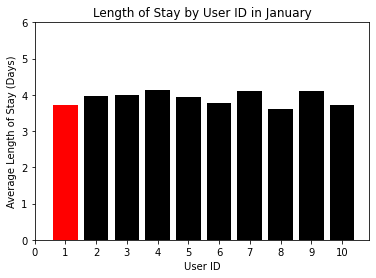

In [239]:
plt.bar(q2_months_los_jan["user_id"], q2_months_los_jan["length_of_stay"], 
        color=['red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black'])
plt.title("Length of Stay by User ID in January")
plt.xlabel("User ID")
plt.ylabel("Average Length of Stay (Days)")
plt.ylim(0,6)
plt.xticks(np.arange(0, 11, step=1))
plt.savefig("../Customer-Success-Team-Project/Images/LOSjan.png")
plt.show()


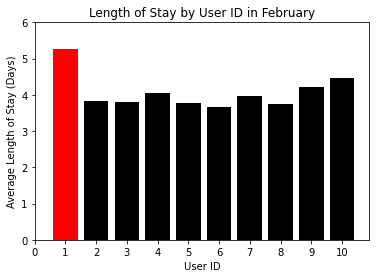

In [240]:
plt.bar(q2_months_los_feb["user_id"], q2_months_los_feb["length_of_stay"],
        color=['red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black'])
plt.title("Length of Stay by User ID in February")
plt.xlabel("User ID")
plt.ylabel("Average Length of Stay (Days)")
plt.xticks(np.arange(0, 11, step=1))
plt.ylim(0,6)
plt.savefig("../Customer-Success-Team-Project/Images/LOSfeb.png")
plt.show()


In [241]:
q1_user_groups_value_counts = q1_user_groups["group_id"].value_counts()
q1_user_groups_value_counts

1    24
3    23
4    20
2    18
Name: group_id, dtype: int64

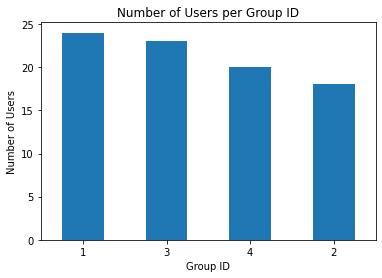

In [242]:
q1_user_groups_value_counts.plot.bar()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of Users per Group ID")
plt.xlabel("Group ID")
plt.ylabel("Number of Users")
plt.savefig("../Customer-Success-Team-Project/Images/NumberofUsersperGroupID.png")
plt.show()

### Observations:

● User_ID 1 had a higher average length of stay in February as compared to other user_ids. This is an increase from length of stay in January, which is similiar to other user_ids. 

● User_ID 1 is assigned to Group 1, which has the most users (24) across the four groups. 

● Given Group 1 (which contains User_ID 1) has the most users, it is likely this is the root cause for a higher average length of stay when compared to other groups with less user_ids. 

● To implement a fairer way to measure user average length of stay, it is important to look at how users are grouped together and sample sizes are relatively close to ensure a larger group size is not inherently driving the average length of stay to increase.

In [243]:
q3_user_scores.head()

,user_id,score,sample_size,date
0,3.0,1.95,90.0,2020-01-01
1,17.0,1.76,88.0,2020-01-01
2,3.0,1.83,119.0,2020-02-01
3,17.0,1.81,105.0,2020-02-01
4,3.0,2.11,113.0,2020-03-01


In [244]:
q3_user_scores = q3_user_scores.groupby(["user_id"])["score"].mean()

In [245]:
q3_user_scores = pd.DataFrame(q3_user_scores).sort_values(by=["score"])
q3_user_scores

,score
user_id,
17.0,1.880000
3.0,1.963333
4.0,4.183333
11.0,4.226667
10.0,4.256667
8.0,4.683333
12.0,4.860000
15.0,4.876667
2.0,5.020000


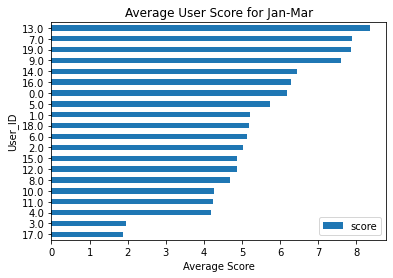

In [246]:
q3_user_scores.plot(kind="barh")
plt.title("Average User Score for Jan-Mar")
plt.xlabel("Average Score")
plt.ylabel("User_ID")
plt.savefig("../Customer-Success-Team-Project/Images/BottomPerformers.png")
plt.show()

### Observations:

● User_IDs: 17, 3, and 4 are the bottom performers for this 3 month period.

● The average user scores were calculated and then plotted to quickly visualize the bottom and top User_IDs.

● User_IDs 17 and 3 has a noteably lower performance rate as compared to the group as a whole. While User_ID 4 is in the bottom three performers (with an average score of 4.18,) their performance is not as low as User IDs 17 and 3 (1.88 and 1.96, respectively.)


In [247]:
date_time = q4_covid_census["date"]
date_time_df = pd.to_datetime(date_time)
date_time_df 

0     2020-03-06
1     2020-03-07
2     2020-03-08
3     2020-03-09
4     2020-03-10
         ...    
661   2021-12-27
662   2021-12-28
663   2021-12-29
664   2021-12-30
665   2021-12-31
Name: date, Length: 666, dtype: datetime64[ns]

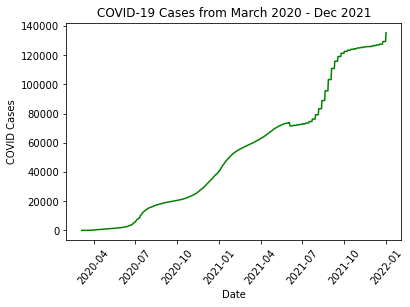

In [248]:
plt.plot(date_time_df, q4_covid_census["cases"], 'g')
plt.xticks(rotation=50, horizontalalignment="center")
plt.title("COVID-19 Cases from March 2020 - Dec 2021")
plt.xlabel("Date")
plt.ylabel("COVID Cases")
plt.savefig("../Customer-Success-Team-Project/Images/COVIDcases.png")
plt.show()

In [249]:
date_time_los = q4_client_monthly_los["date"]
date_time_los = pd.to_datetime(date_time_los)
date_time_los 

0    2020-03-31
1    2020-04-30
2    2020-05-31
3    2020-06-30
4    2020-07-31
5    2020-08-31
6    2020-09-30
7    2020-10-31
8    2020-11-30
9    2020-12-31
10   2021-01-31
11   2021-02-28
12   2021-03-31
13   2021-04-30
14   2021-05-31
15   2021-06-30
16   2021-07-31
17   2021-08-31
18   2021-09-30
19   2021-10-31
20   2021-11-30
21   2021-12-31
Name: date, dtype: datetime64[ns]

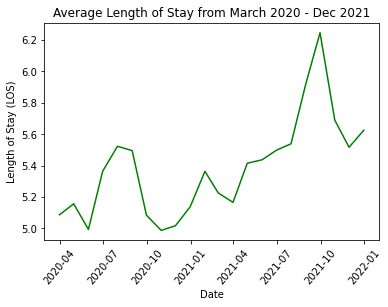

In [250]:
plt.plot(date_time_los, q4_client_monthly_los["length_of_stay"], 'g')
plt.xticks(rotation=50, horizontalalignment="center")
plt.title("Average Length of Stay from March 2020 - Dec 2021")
plt.xlabel("Date")
plt.ylabel("Length of Stay (LOS)")
plt.savefig("../Customer-Success-Team-Project/Images/LOS.png")
plt.show()